In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sql-injection-dataset/Modified_SQL_Dataset.csv


In [22]:
data = pd.read_csv("/kaggle/input/sql-injection-dataset/Modified_SQL_Dataset.csv")  # Replace with your dataset path

# Inspect the dataset
# Randomize the dataset
randomized_data = data.sample(frac=1, random_state=42)  # Use a fixed random_state for reproducibility

# Display the last few rows of the randomized dataset
randomized_data.tail(10)

,Query,Label
6265,1' where 4880 = 4880 and ( select 2* ( ...,1
22118,"SELECT contrastID AS ID, silent AS fierce FR...",0
11284,"-1504"" ) as wpes where 6256 = 6256 union ...",1
11964,minas de riotinto,0
21575,DELETE FROM fewer,0
29802,"SELECT column_name ( s ) FROM suggest,had",0
5390,1' ) and 4380 = 5851 and ( 'cxcl' = ...,1
860,"select * from users where id = 1 or 1#""{ un...",1
15795,baxley@italianmotorvillagesevilla.sh,0
23654,SELECT * FROM lungs WHERE advice = 'egg' LIMIT 3,0


In [16]:
# Display basic information about the dataset
data.info()

# Count the distribution of labels in the "Label" column
label_counts = data['Label'].value_counts()

# Print the label counts
print("Label Distribution:")
print(label_counts)

# Optionally, calculate the percentage distribution of labels
label_percentage = data['Label'].value_counts(normalize=True) * 100
print("\nLabel Percentage Distribution:")
print(label_percentage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Query   30919 non-null  object
 1   Label   30919 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 483.2+ KB
Label Distribution:
Label
0    19537
1    11382
Name: count, dtype: int64

Label Percentage Distribution:
Label
0    63.187684
1    36.812316
Name: proportion, dtype: float64


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Load the Kaggle Dataset
# Update the file path if you're running locally
data = pd.read_csv("/kaggle/input/sql-injection-dataset/Modified_SQL_Dataset.csv")  # Replace with your dataset path

# Inspect the dataset
print(data.head())

# Ensure columns match: "Sentence" for queries and "Label" for binary classification
X = data["Query"]  # SQL queries
y = data["Label"]      # 0 = benign, 1 = malicious

# Step 2: Preprocess Data
# Tokenize the text (convert queries to integer indices)
tokenizer = Tokenizer(num_words=10000)  # Limit vocabulary size to 10,000
tokenizer.fit_on_texts(X)
X_tokenized = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform length
max_sequence_length = 100  # Set a maximum sequence length
X_padded = pad_sequences(X_tokenized, maxlen=max_sequence_length, padding='post')

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Step 3: Build the CNN Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),  # Embedding layer
    Conv1D(filters=64, kernel_size=3, activation='relu'),  # Convolutional layer
    MaxPooling1D(pool_size=2),  # Max pooling layer
    Dropout(0.5),  # Dropout for regularization
    Flatten(),  # Flatten the feature maps
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 5: Evaluate the Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Test on New Inputs
new_queries = ["SELECT * FROM users WHERE username='admin' AND password='123'",
               "' OR 1=1 --",
               "DROP TABLE users; --",
               "Safe query with no injection"]
new_queries_tokenized = tokenizer.texts_to_sequences(new_queries)
new_queries_padded = pad_sequences(new_queries_tokenized, maxlen=max_sequence_length, padding='post')

predictions = model.predict(new_queries_padded)
for query, pred in zip(new_queries, predictions):
    print(f"Query: {query}")
    print("SQL Injection Detected!" if pred > 0.5 else "Query is Safe.")
    print("-" * 50)


                                               Query  Label
0                  " or pg_sleep  (  __TIME__  )  --      1
1  create user name identified by pass123 tempora...      1
2   AND 1  =  utl_inaddr.get_host_address   (    ...      1
3   select * from users where id  =  '1' or @ @1 ...      1
4   select * from users where id  =  1 or 1#"  ( ...      1
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


619/619 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8989 - loss: 0.2218 - val_accuracy: 0.9943 - val_loss: 0.0377
Epoch 2/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9961 - loss: 0.0224 - val_accuracy: 0.9960 - val_loss: 0.0194
Epoch 3/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9961 - loss: 0.0208 - val_accuracy: 0.9960 - val_loss: 0.0205
Epoch 4/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9977 - loss: 0.0130 - val_accuracy: 0.9960 - val_loss: 0.0215
Epoch 5/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9972 - loss: 0.0145 - val_accuracy: 0.9947 - val_loss: 0.0235
Epoch 6/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9979 - loss: 0.0138 - val_accuracy: 0.9929 - val_loss: 0.0313
Epoch 7/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9977 - loss: 0.0136 - val_accuracy: 0.9951 - val_loss: 0.0263
Epoch 8/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9976 - loss: 0.0122 - val_accurac

In [3]:
import pickle
from tensorflow.keras.models import save_model

# 1. Save the Keras model (recommended format: .h5 or SavedModel)
model.save('sql_injection_cnn.h5')  # Or use model.save('saved_model/') for SavedModel format

# 2. Save the tokenizer and metadata
with open('sql_tokenizer.pkl', 'wb') as f:
    pickle.dump({
        'tokenizer': tokenizer,
        'max_sequence_length': max_sequence_length,
        'vocab_size': 10000  # Same as num_words in Tokenizer
    }, f)

print("Model saved to sql_injection_cnn.h5")
print("Tokenizer saved to sql_tokenizer.pkl")

Model saved to sql_injection_cnn.h5
Tokenizer saved to sql_tokenizer.pkl


In [6]:
safe_queries = [
    "SELECT * FROM users WHERE username='john' AND password='doe123'",
    "SELECT id, name FROM students WHERE class='10A'",
    "UPDATE users SET password='newpass' WHERE user_id=1",
    "INSERT INTO orders (user_id, item_id, quantity) VALUES (1, 2, 3)",
    "DELETE FROM products WHERE product_id=100",
    "SELECT * FROM employees WHERE department='HR'",
    "SELECT COUNT(*) FROM login_logs WHERE date='2023-12-25'",
    "SELECT * FROM articles WHERE published=1 ORDER BY date DESC",
    "SELECT name FROM users WHERE email='test@example.com'",
    "INSERT INTO feedback (user_id, message) VALUES (5, 'Great product!')",
    "UPDATE accounts SET status='active' WHERE last_login > '2024-01-01'",
    "SELECT price FROM products WHERE product_name='Laptop'",
    "DELETE FROM sessions WHERE session_expires < NOW()",
    "SELECT AVG(score) FROM results WHERE subject='Math'",
    "SELECT * FROM blog_posts WHERE category='Tech' AND published=1"
]
malicious_queries = [
    "' OR 1=1 --",
    "' OR '1'='1",
    "admin' --",
    "' UNION SELECT NULL, NULL, NULL --",
    "'; DROP TABLE users; --",
    "' OR '' = '",
    "1' OR '1' = '1'; --",
    "' OR 1=1#",
    "' OR 1=1/*",
    "admin' #",
    "' OR EXISTS(SELECT * FROM users) --",
    "' OR SLEEP(5) --",
    "' AND 1=2 UNION SELECT null, username, password FROM users --",
    "' OR 1=1 LIMIT 1 OFFSET 1 --",
    "' OR ''=''; DROP TABLE students; --"
]



In [7]:
test_queries = malicious_queries + safe_queries
test_tokenized = tokenizer.texts_to_sequences(test_queries)
test_padded = pad_sequences(test_tokenized, maxlen=max_sequence_length, padding='post')

predictions = model.predict(test_padded)

for query, pred in zip(test_queries, predictions):
    print(f"Query: {query}")
    print("SQL Injection Detected!" if pred > 0.5 else "Query is Safe.")
    print("-" * 50)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Query: ' OR 1=1 --
SQL Injection Detected!
--------------------------------------------------
Query: ' OR '1'='1
SQL Injection Detected!
--------------------------------------------------
Query: admin' --
SQL Injection Detected!
--------------------------------------------------
Query: ' UNION SELECT NULL, NULL, NULL --
SQL Injection Detected!
--------------------------------------------------
Query: '; DROP TABLE users; --
SQL Injection Detected!
--------------------------------------------------
Query: ' OR '' = '
SQL Injection Detected!
--------------------------------------------------
Query: 1' OR '1' = '1'; --
SQL Injection Detected!
--------------------------------------------------
Query: ' OR 1=1#
SQL Injection Detected!
--------------------------------------------------
Query: ' OR 1=1/*
SQL Injection Detected!
--------------------------------------------------
Query: admin' #
SQL Injection Detected!
--------------------------------------

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
import pickle

print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("tensorflow version:", tf.__version__)
print("scikit-learn version:", sklearn.__version__)


pandas version: 2.1.4
numpy version: 1.26.4
tensorflow version: 2.17.0
scikit-learn version: 1.2.2


                                               Query  Label
0                  " or pg_sleep  (  __TIME__  )  --      1
1  create user name identified by pass123 tempora...      1
2   AND 1  =  utl_inaddr.get_host_address   (    ...      1
3   select * from users where id  =  '1' or @ @1 ...      1
4   select * from users where id  =  1 or 1#"  ( ...      1
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


619/619 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9105 - loss: 0.1986 - val_accuracy: 0.9949 - val_loss: 0.0265
Epoch 2/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9948 - loss: 0.0250 - val_accuracy: 0.9947 - val_loss: 0.0372
Epoch 3/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9958 - loss: 0.0193 - val_accuracy: 0.9949 - val_loss: 0.0192
Epoch 4/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9974 - loss: 0.0133 - val_accuracy: 0.9956 - val_loss: 0.0210
Epoch 5/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9978 - loss: 0.0126 - val_accuracy: 0.9951 - val_loss: 0.0224
Epoch 6/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9974 - loss: 0.0143 - val_accuracy: 0.9929 - val_loss: 0.0249
Epoch 7/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9983 - loss: 0.0105 - val_accuracy: 0.9939 - val_loss: 0.0258
Epoch 8/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9978 - loss: 0.0139 - val_accurac

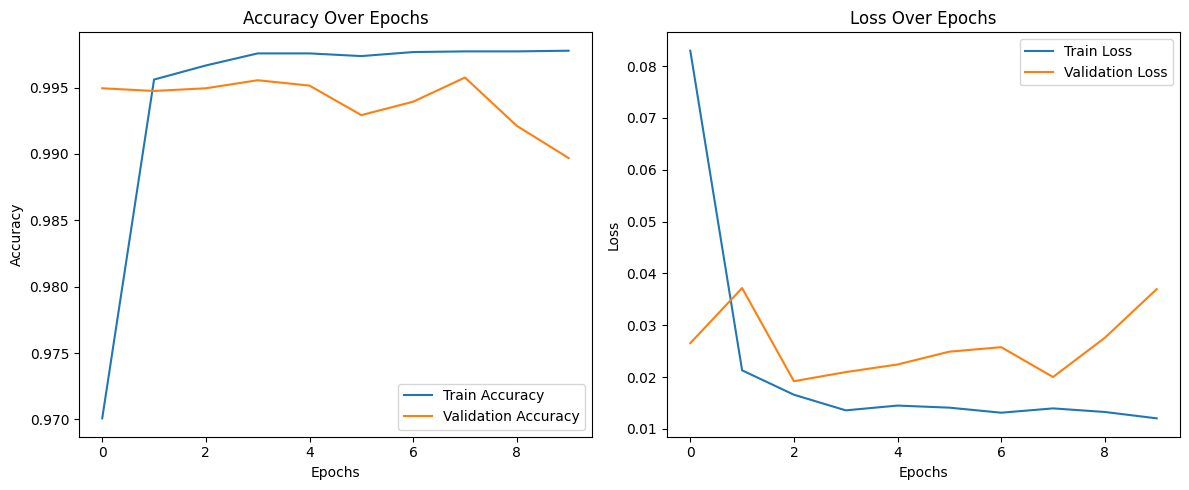

Model structure saved as 'model_structure.png'.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 98, 64)              │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,516,421 (17.23 MB)

 Trainable params: 1,505,473 (5.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,010,948 (11.49 MB)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Step 1: Load the Kaggle Dataset
data = pd.read_csv("/kaggle/input/sql-injection-dataset/Modified_SQL_Dataset.csv")  # Replace with your dataset path

# Inspect the dataset
print(data.head())

# Ensure columns match: "Sentence" for queries and "Label" for binary classification
X = data["Query"]  # SQL queries
y = data["Label"]  # 0 = benign, 1 = malicious

# Step 2: Preprocess Data
# Tokenize the text (convert queries to integer indices)
tokenizer = Tokenizer(num_words=10000)  # Limit vocabulary size to 10,000
tokenizer.fit_on_texts(X)
X_tokenized = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform length
max_sequence_length = 100  # Set a maximum sequence length
X_padded = pad_sequences(X_tokenized, maxlen=max_sequence_length, padding='post')

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Step 3: Build the CNN Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),  # Embedding layer
    Conv1D(filters=64, kernel_size=3, activation='relu'),  # Convolutional layer
    MaxPooling1D(pool_size=2),  # Max pooling layer
    Dropout(0.5),  # Dropout for regularization
    Flatten(),  # Flatten the feature maps
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Step 5: Evaluate the Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report with precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Step 6: Training Plots
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 7: Model Structure Picture
# Save and display the model architecture as an image
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)
print("Model structure saved as 'model_structure.png'.")

# Step 8: Model Summary
# Print the model summary
model.summary()

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Dropout
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Load the Kaggle Dataset
# Update the file path if you're running locally
data = pd.read_csv("/kaggle/input/sql-injection-dataset/Modified_SQL_Dataset.csv")  # Replace with your dataset path

# Inspect the dataset
print(data.head())

# Ensure columns match: "Query" for SQL queries and "Label" for binary classification
X = data["Query"]  # SQL queries
y = data["Label"]  # 0 = benign, 1 = malicious

# Create train/test split first to ensure all models use the same data division
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Prepare different feature representations for different models

# 2.1 For traditional ML models (Random Forest, SVM), use TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_raw)
X_test_tfidf = tfidf_vectorizer.transform(X_test_raw)

# 2.2 For deep learning models (CNN, LSTM), use tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train_raw)
X_train_seq = tokenizer.texts_to_sequences(X_train_raw)
X_test_seq = tokenizer.texts_to_sequences(X_test_raw)

max_sequence_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

# Step 3: Build and train four different models

# 3.1 Random Forest model
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)
print("Random Forest accuracy:", accuracy_score(y_test, rf_pred))

# 3.2 SVM model
print("Training SVM model...")
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)
print("SVM accuracy:", accuracy_score(y_test, svm_pred))

# 3.3 CNN model
print("Training CNN model...")
cnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)
cnn_pred = (cnn_model.predict(X_test_padded) > 0.5).astype("int32").flatten()
print("CNN accuracy:", accuracy_score(y_test, cnn_pred))

# 3.4 LSTM model
print("Training LSTM model...")
lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)
lstm_pred = (lstm_model.predict(X_test_padded) > 0.5).astype("int32").flatten()
print("LSTM accuracy:", accuracy_score(y_test, lstm_pred))

# Step 4: Combine predictions with majority voting
print("\nGenerating ensemble predictions with majority voting...")
ensemble_pred = []

for i in range(len(y_test)):
    votes = [rf_pred[i], svm_pred[i], cnn_pred[i], lstm_pred[i]]
    # Majority voting (most common prediction wins)
    ensemble_pred.append(np.bincount(votes).argmax())

ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble accuracy:", ensemble_accuracy)
print("\nEnsemble Classification Report:")
print(classification_report(y_test, ensemble_pred))

# Step 5: Test on new inputs
print("\nTesting on new example queries:")
new_queries = [
    "SELECT * FROM users WHERE username='admin' AND password='123'",
    "' OR 1=1 --",
    "DROP TABLE users; --",
    "Safe query with no injection",
    "SELECT first_name, last_name FROM customers WHERE region='North'",
    "UNION SELECT username, password FROM users--"
]

# Process for Random Forest and SVM
new_queries_tfidf = tfidf_vectorizer.transform(new_queries)
rf_new_pred = rf_model.predict(new_queries_tfidf)
svm_new_pred = svm_model.predict(new_queries_tfidf)

# Process for CNN and LSTM
new_queries_seq = tokenizer.texts_to_sequences(new_queries)
new_queries_padded = pad_sequences(new_queries_seq, maxlen=max_sequence_length, padding='post')
cnn_new_pred = (cnn_model.predict(new_queries_padded) > 0.5).astype("int32").flatten()
lstm_new_pred = (lstm_model.predict(new_queries_padded) > 0.5).astype("int32").flatten()

# Combine with majority voting
ensemble_new_pred = []
individual_votes = []

for i in range(len(new_queries)):
    votes = [rf_new_pred[i], svm_new_pred[i], cnn_new_pred[i], lstm_new_pred[i]]
    individual_votes.append(votes)
    ensemble_new_pred.append(np.bincount(votes).argmax())

# Display results
for i, query in enumerate(new_queries):
    print(f"Query: {query}")
    print(f"Model votes: RF={rf_new_pred[i]}, SVM={svm_new_pred[i]}, CNN={cnn_new_pred[i]}, LSTM={lstm_new_pred[i]}")
    print("ENSEMBLE PREDICTION:", "SQL Injection Detected!" if ensemble_new_pred[i] == 1 else "Query is Safe.")
    print("-" * 50)

# Optionally, save the models for future use
import pickle
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)
cnn_model.save('cnn_model.h5')
lstm_model.save('lstm_model.h5')

# Save tokenizer and vectorizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Example function to use the ensemble for new predictions
def predict_sql_injection(query, rf_model, svm_model, cnn_model, lstm_model, 
                         tokenizer, tfidf_vectorizer, max_sequence_length=100):
    """
    Use the ensemble to predict if a query contains SQL injection
    """
    # Prepare for traditional ML models
    query_tfidf = tfidf_vectorizer.transform([query])
    rf_pred = rf_model.predict(query_tfidf)[0]
    svm_pred = svm_model.predict(query_tfidf)[0]
    
    # Prepare for deep learning models
    query_seq = tokenizer.texts_to_sequences([query])
    query_padded = pad_sequences(query_seq, maxlen=max_sequence_length, padding='post')
    cnn_pred = int((cnn_model.predict(query_padded) > 0.5)[0][0])
    lstm_pred = int((lstm_model.predict(query_padded) > 0.5)[0][0])
    
    # Majority voting
    votes = [rf_pred, svm_pred, cnn_pred, lstm_pred]
    ensemble_pred = np.bincount(votes).argmax()
    
    return {
        'query': query,
        'votes': {'rf': int(rf_pred), 'svm': int(svm_pred), 'cnn': cnn_pred, 'lstm': lstm_pred},
        'prediction': int(ensemble_pred),
        'is_malicious': bool(ensemble_pred)
    }

                                               Query  Label
0                  " or pg_sleep  (  __TIME__  )  --      1
1  create user name identified by pass123 tempora...      1
2   AND 1  =  utl_inaddr.get_host_address   (    ...      1
3   select * from users where id  =  '1' or @ @1 ...      1
4   select * from users where id  =  1 or 1#"  ( ...      1
Training Random Forest model...
Random Forest accuracy: 0.9953104786545925
Training SVM model...
SVM accuracy: 0.9941785252263907
Training CNN model...
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


619/619 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.8868 - loss: 0.2467 - val_accuracy: 0.9943 - val_loss: 0.0267
Epoch 2/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9959 - loss: 0.0213 - val_accuracy: 0.9919 - val_loss: 0.0388
Epoch 3/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9963 - loss: 0.0190 - val_accuracy: 0.9921 - val_loss: 0.0298
Epoch 4/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9965 - loss: 0.0186 - val_accuracy: 0.9893 - val_loss: 0.0428
Epoch 5/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9971 - loss: 0.0165 - val_accuracy: 0.9925 - val_loss: 0.0306
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
CNN accuracy: 0.9936934023285899
Training LSTM model...
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


619/619 ━━━━━━━━━━━━━━━━━━━━ 80s 118ms/step - accuracy: 0.9258 - loss: 0.1746 - val_accuracy: 0.9951 - val_loss: 0.0247
Epoch 2/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 72s 116ms/step - accuracy: 0.9959 - loss: 0.0218 - val_accuracy: 0.9935 - val_loss: 0.0240
Epoch 3/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.9967 - loss: 0.0175 - val_accuracy: 0.9947 - val_loss: 0.0259
Epoch 4/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.9969 - loss: 0.0157 - val_accuracy: 0.9911 - val_loss: 0.0290
Epoch 5/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 72s 117ms/step - accuracy: 0.9978 - loss: 0.0124 - val_accuracy: 0.9954 - val_loss: 0.0219
194/194 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step
LSTM accuracy: 0.9954721862871928

Generating ensemble predictions with majority voting...
Ensemble accuracy: 0.9953104786545925

Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3893
           1       1.00      0.99      0.99    

In [ ]:
import os
import pickle
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define a directory to store all model files
MODEL_DIR = "sql_injection_ensemble_models"
os.makedirs(MODEL_DIR, exist_ok=True)

# 1. Save all models and associated data
def save_ensemble_models(rf_model, svm_model, cnn_model, lstm_model, 
                         tokenizer, tfidf_vectorizer, max_sequence_length, 
                         training_history=None, class_labels=None):
    """
    Save all models and their associated data for the SQL injection ensemble
    
    Parameters:
    -----------
    rf_model : RandomForestClassifier
        Trained Random Forest model
    svm_model : SVC
        Trained SVM model
    cnn_model : tf.keras.Model
        Trained CNN model
    lstm_model : tf.keras.Model
        Trained LSTM model
    tokenizer : Tokenizer
        Fitted tokenizer used for neural networks
    tfidf_vectorizer : TfidfVectorizer
        Fitted TF-IDF vectorizer for traditional ML models
    max_sequence_length : int
        Maximum sequence length for padding
    training_history : dict, optional
        Training history for neural network models
    class_labels : list or dict, optional
        Class labels mapping
    """
    print(f"Saving all models to {MODEL_DIR}...")
    
    # Save metadata and configuration
    metadata = {
        'max_sequence_length': max_sequence_length,
        'class_labels': class_labels if class_labels else {0: 'benign', 1: 'malicious'},
        'model_version': '1.0',
        'models_included': ['random_forest', 'svm', 'cnn', 'lstm'],
        'created_date': pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S")
    }
    
    with open(os.path.join(MODEL_DIR, 'metadata.json'), 'w') as f:
        json.dump(metadata, f, indent=4)
    
    # Save traditional ML models
    with open(os.path.join(MODEL_DIR, 'random_forest.pkl'), 'wb') as f:
        pickle.dump(rf_model, f)
        
    with open(os.path.join(MODEL_DIR, 'svm.pkl'), 'wb') as f:
        pickle.dump(svm_model, f)
    
    # Save deep learning models
    cnn_model.save(os.path.join(MODEL_DIR, 'cnn_model'))  # SavedModel format
    lstm_model.save(os.path.join(MODEL_DIR, 'lstm_model'))  # SavedModel format
    
    # Save tokenizer for text preprocessing (neural networks)
    with open(os.path.join(MODEL_DIR, 'tokenizer.pkl'), 'wb') as f:
        pickle.dump(tokenizer, f)
    
    # Save TF-IDF vectorizer for text preprocessing (traditional ML)
    with open(os.path.join(MODEL_DIR, 'tfidf_vectorizer.pkl'), 'wb') as f:
        pickle.dump(tfidf_vectorizer, f)
    
    # Save training history if provided
    if training_history:
        with open(os.path.join(MODEL_DIR, 'training_history.pkl'), 'wb') as f:
            pickle.dump(training_history, f)
    
    # Save example inference code as a Python file
    with open(os.path.join(MODEL_DIR, 'inference_example.py'), 'w') as f:
        f.write('''
import os
import pickle
import json
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

def load_sql_injection_ensemble():
    """Load the ensemble of models and preprocessing tools"""
    MODEL_DIR = "sql_injection_ensemble_models"
    
    # Load metadata
    with open(os.path.join(MODEL_DIR, 'metadata.json'), 'r') as f:
        metadata = json.load(f)
    
    # Load traditional ML models
    with open(os.path.join(MODEL_DIR, 'random_forest.pkl'), 'rb') as f:
        rf_model = pickle.load(f)
    
    with open(os.path.join(MODEL_DIR, 'svm.pkl'), 'rb') as f:
        svm_model = pickle.load(f)
    
    # Load deep learning models
    cnn_model = load_model(os.path.join(MODEL_DIR, 'cnn_model'))
    lstm_model = load_model(os.path.join(MODEL_DIR, 'lstm_model'))
    
    # Load preprocessing tools
    with open(os.path.join(MODEL_DIR, 'tokenizer.pkl'), 'rb') as f:
        tokenizer = pickle.load(f)
    
    with open(os.path.join(MODEL_DIR, 'tfidf_vectorizer.pkl'), 'rb') as f:
        tfidf_vectorizer = pickle.load(f)
    
    return {
        'rf_model': rf_model,
        'svm_model': svm_model,
        'cnn_model': cnn_model,
        'lstm_model': lstm_model,
        'tokenizer': tokenizer,
        'tfidf_vectorizer': tfidf_vectorizer,
        'metadata': metadata
    }

def predict_sql_injection(query, models=None):
    """
    Predict whether a SQL query contains an injection attack using ensemble voting
    
    Parameters:
    -----------
    query : str
        The SQL query to check
    models : dict, optional
        Pre-loaded models and tools. If None, models will be loaded
    
    Returns:
    --------
    dict
        Prediction results including individual model votes and final ensemble decision
    """
    if models is None:
        models = load_sql_injection_ensemble()
    
    # Extract models and tools
    rf_model = models['rf_model']
    svm_model = models['svm_model']
    cnn_model = models['cnn_model']
    lstm_model = models['lstm_model']
    tokenizer = models['tokenizer']
    tfidf_vectorizer = models['tfidf_vectorizer']
    max_sequence_length = models['metadata']['max_sequence_length']
    
    # Process for traditional ML models (RF and SVM)
    query_tfidf = tfidf_vectorizer.transform([query])
    rf_pred = rf_model.predict(query_tfidf)[0]
    svm_pred = svm_model.predict(query_tfidf)[0]
    
    # Process for deep learning models (CNN and LSTM)
    query_seq = tokenizer.texts_to_sequences([query])
    query_padded = pad_sequences(query_seq, maxlen=max_sequence_length, padding='post')
    cnn_pred = int((cnn_model.predict(query_padded) > 0.5)[0][0])
    lstm_pred = int((lstm_model.predict(query_padded) > 0.5)[0][0])
    
    # Combine predictions with majority voting
    votes = [rf_pred, svm_pred, cnn_pred, lstm_pred]
    ensemble_pred = np.bincount(votes).argmax()
    
    return {
        'query': query,
        'votes': {
            'random_forest': int(rf_pred), 
            'svm': int(svm_pred), 
            'cnn': cnn_pred, 
            'lstm': lstm_pred
        },
        'prediction': int(ensemble_pred),
        'is_malicious': bool(ensemble_pred),
        'confidence': float(np.bincount(votes).max() / len(votes))
    }

# Example usage
if __name__ == "__main__":
    test_queries = [
        "SELECT * FROM users WHERE username='admin';",
        "' OR 1=1 --",
        "DROP TABLE users; --",
        "SELECT first_name, last_name FROM customers WHERE region='North'"
    ]
    
    # Load models once for efficiency
    models = load_sql_injection_ensemble()
    
    for query in test_queries:
        result = predict_sql_injection(query, models)
        print(f"Query: {result['query']}")
        print(f"Prediction: {'MALICIOUS' if result['is_malicious'] else 'BENIGN'}")
        print(f"Confidence: {result['confidence'] * 100:.1f}%")
        print(f"Model votes: {result['votes']}")
        print("-" * 50)
''')
    
    print(f"All models and associated data saved to {MODEL_DIR}")
    return MODEL_DIR

# 2. Load all models and associated data
def load_ensemble_models(model_dir=MODEL_DIR):
    """
    Load all models and their associated data for the SQL injection ensemble
    
    Parameters:
    -----------
    model_dir : str
        Directory where models are saved
        
    Returns:
    --------
    dict
        Dictionary containing all loaded models and preprocessing tools
    """
    print(f"Loading all models from {model_dir}...")
    
    # Load metadata
    with open(os.path.join(model_dir, 'metadata.json'), 'r') as f:
        metadata = json.load(f)
    
    # Load traditional ML models
    with open(os.path.join(model_dir, 'random_forest.pkl'), 'rb') as f:
        rf_model = pickle.load(f)
    
    with open(os.path.join(model_dir, 'svm.pkl'), 'rb') as f:
        svm_model = pickle.load(f)
    
    # Load deep learning models
    cnn_model = load_model(os.path.join(model_dir, 'cnn_model'))
    lstm_model = load_model(os.path.join(model_dir, 'lstm_model'))
    
    # Load preprocessing tools
    with open(os.path.join(model_dir, 'tokenizer.pkl'), 'rb') as f:
        tokenizer = pickle.load(f)
    
    with open(os.path.join(model_dir, 'tfidf_vectorizer.pkl'), 'rb') as f:
        tfidf_vectorizer = pickle.load(f)
    
    # Load training history if available
    training_history = None
    history_path = os.path.join(model_dir, 'training_history.pkl')
    if os.path.exists(history_path):
        with open(history_path, 'rb') as f:
            training_history = pickle.load(f)
    
    return {
        'rf_model': rf_model,
        'svm_model': svm_model,
        'cnn_model': cnn_model,
        'lstm_model': lstm_model,
        'tokenizer': tokenizer,
        'tfidf_vectorizer': tfidf_vectorizer,
        'metadata': metadata,
        'training_history': training_history
    }

# 3. Function to make predictions with the loaded ensemble
def predict_with_ensemble(query, models=None):
    """
    Predict whether a SQL query contains an injection attack using the ensemble
    
    Parameters:
    -----------
    query : str
        The SQL query to check
    models : dict, optional
        Pre-loaded models and tools. If None, models will be loaded
        
    Returns:
    --------
    dict
        Prediction results including individual model votes and final ensemble decision
    """
    # Load models if not provided
    if models is None:
        models = load_ensemble_models()
    
    # Extract models and tools
    rf_model = models['rf_model']
    svm_model = models['svm_model']
    cnn_model = models['cnn_model']
    lstm_model = models['lstm_model']
    tokenizer = models['tokenizer']
    tfidf_vectorizer = models['tfidf_vectorizer']
    max_sequence_length = models['metadata']['max_sequence_length']
    
    # Process for traditional ML models (RF and SVM)
    query_tfidf = tfidf_vectorizer.transform([query])
    rf_pred = rf_model.predict(query_tfidf)[0]
    rf_prob = rf_model.predict_proba(query_tfidf)[0][1] if hasattr(rf_model, 'predict_proba') else None
    
    svm_pred = svm_model.predict(query_tfidf)[0]
    svm_prob = svm_model.predict_proba(query_tfidf)[0][1] if hasattr(svm_model, 'predict_proba') else None
    
    # Process for deep learning models (CNN and LSTM)
    query_seq = tokenizer.texts_to_sequences([query])
    query_padded = pad_sequences(query_seq, maxlen=max_sequence_length, padding='post')
    
    cnn_prob = float(cnn_model.predict(query_padded)[0][0])
    cnn_pred = int(cnn_prob > 0.5)
    
    lstm_prob = float(lstm_model.predict(query_padded)[0][0])
    lstm_pred = int(lstm_prob > 0.5)
    
    # Combine predictions with majority voting
    votes = [rf_pred, svm_pred, cnn_pred, lstm_pred]
    ensemble_pred = np.bincount(votes).argmax()
    
    # Calculate confidence score
    confidence = float(np.bincount(votes).max() / len(votes))
    
    # Get probabilities where available
    probabilities = {
        'random_forest': float(rf_prob) if rf_prob is not None else None,
        'svm': float(svm_prob) if svm_prob is not None else None,
        'cnn': cnn_prob,
        'lstm': lstm_prob
    }
    
    # Filter out None values
    valid_probs = [p for p in probabilities.values() if p is not None]
    avg_prob = float(sum(valid_probs) / len(valid_probs)) if valid_probs else None
    
    return {
        'query': query,
        'votes': {
            'random_forest': int(rf_pred), 
            'svm': int(svm_pred), 
            'cnn': cnn_pred, 
            'lstm': lstm_pred
        },
        'probabilities': probabilities,
        'prediction': int(ensemble_pred),
        'is_malicious': bool(ensemble_pred),
        'vote_confidence': confidence,
        'avg_probability': avg_prob
    }

# 4. Function to check model health and version
def check_model_health(model_dir=MODEL_DIR):
    """
    Verify that all model components are present and consistent
    
    Parameters:
    -----------
    model_dir : str
        Directory where models are saved
        
    Returns:
    --------
    bool
        True if all components are present and consistent, False otherwise
    """
    required_files = [
        'metadata.json',
        'random_forest.pkl',
        'svm.pkl',
        'cnn_model',
        'lstm_model',
        'tokenizer.pkl',
        'tfidf_vectorizer.pkl'
    ]
    
    # Check if all required files exist
    missing_files = [f for f in required_files if not os.path.exists(os.path.join(model_dir, f))]
    
    if missing_files:
        print(f"Health check failed: Missing files: {missing_files}")
        return False
    
    # Load metadata to verify version
    try:
        with open(os.path.join(model_dir, 'metadata.json'), 'r') as f:
            metadata = json.load(f)
        
        # Add any additional checks here (e.g., model version compatibility)
        print(f"Model health check passed. Version: {metadata.get('model_version', 'unknown')}")
        return True
    except Exception as e:
        print(f"Health check failed: Error loading metadata: {str(e)}")
        return False

# 5. Example of using the saved models
def example_usage():
    """
    Example of how to use the saved models for predictions
    """
    import pandas as pd
    
    # 1. Load all models (do this once)
    models = load_ensemble_models()
    
    # 2. Make predictions on new queries
    test_queries = [
        "SELECT * FROM users WHERE username='admin';",
        "' OR 1=1 --",
        "DROP TABLE users; --",
        "SELECT first_name, last_name FROM customers WHERE region='North'",
        "UNION SELECT username, password FROM users--",
        "INSERT INTO users VALUES ('john', 'password123')"
    ]
    
    # 3. Process each query
    results = []
    for query in test_queries:
        prediction = predict_with_ensemble(query, models)
        results.append(prediction)

    # 4. Display results in a DataFrame
    df_results = pd.DataFrame([{
        'Query': r['query'],
        'Prediction': 'MALICIOUS' if r['is_malicious'] else 'BENIGN',
        'Confidence': f"{r['vote_confidence'] * 100:.1f}%",
        'RF': r['votes']['random_forest'],
        'SVM': r['votes']['svm'],
        'CNN': r['votes']['cnn'],
        'LSTM': r['votes']['lstm'],
        'Avg Probability': f"{r['avg_probability'] * 100:.1f}%" if r['avg_probability'] is not None else 'N/A'
    } for r in results])
    
    print(df_results)
    return results

# Example of how to call these functions after training your models
if __name__ == "__main__":
    # Assuming you've already trained your models...
    
    # 1. Save all models
    save_ensemble_models(
        rf_model=rf_model,                 # Your trained Random Forest model
        svm_model=svm_model,               # Your trained SVM model
        cnn_model=cnn_model,               # Your trained CNN model
        lstm_model=lstm_model,             # Your trained LSTM model
        tokenizer=tokenizer,               # Your fitted tokenizer
        tfidf_vectorizer=tfidf_vectorizer, # Your fitted TF-IDF vectorizer
        max_sequence_length=max_sequence_length,
        training_history={                 # Example of training history
            'cnn': cnn_history.history,
            'lstm': lstm_history.history
        }
    )
    
    # 2. Check model health
    check_model_health()
    
    # 3. Run example predictions
    example_usage()


===== MODEL PERFORMANCE METRICS =====

Random Forest Metrics:
Accuracy: 0.9953
Precision: 0.9991
Recall: 0.9882
F1-Score: 0.9936

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3893
           1       1.00      0.99      0.99      2291

    accuracy                           1.00      6184
   macro avg       1.00      0.99      0.99      6184
weighted avg       1.00      1.00      1.00      6184


SVM Metrics:
Accuracy: 0.9942
Precision: 0.9996
Recall: 0.9847
F1-Score: 0.9921

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3893
           1       1.00      0.98      0.99      2291

    accuracy                           0.99      6184
   macro avg       1.00      0.99      0.99      6184
weighted avg       0.99      0.99      0.99      6184


CNN Metrics:
Accuracy: 0.9937
Precision: 0.9904
Recall: 0.9926
F1-Sc

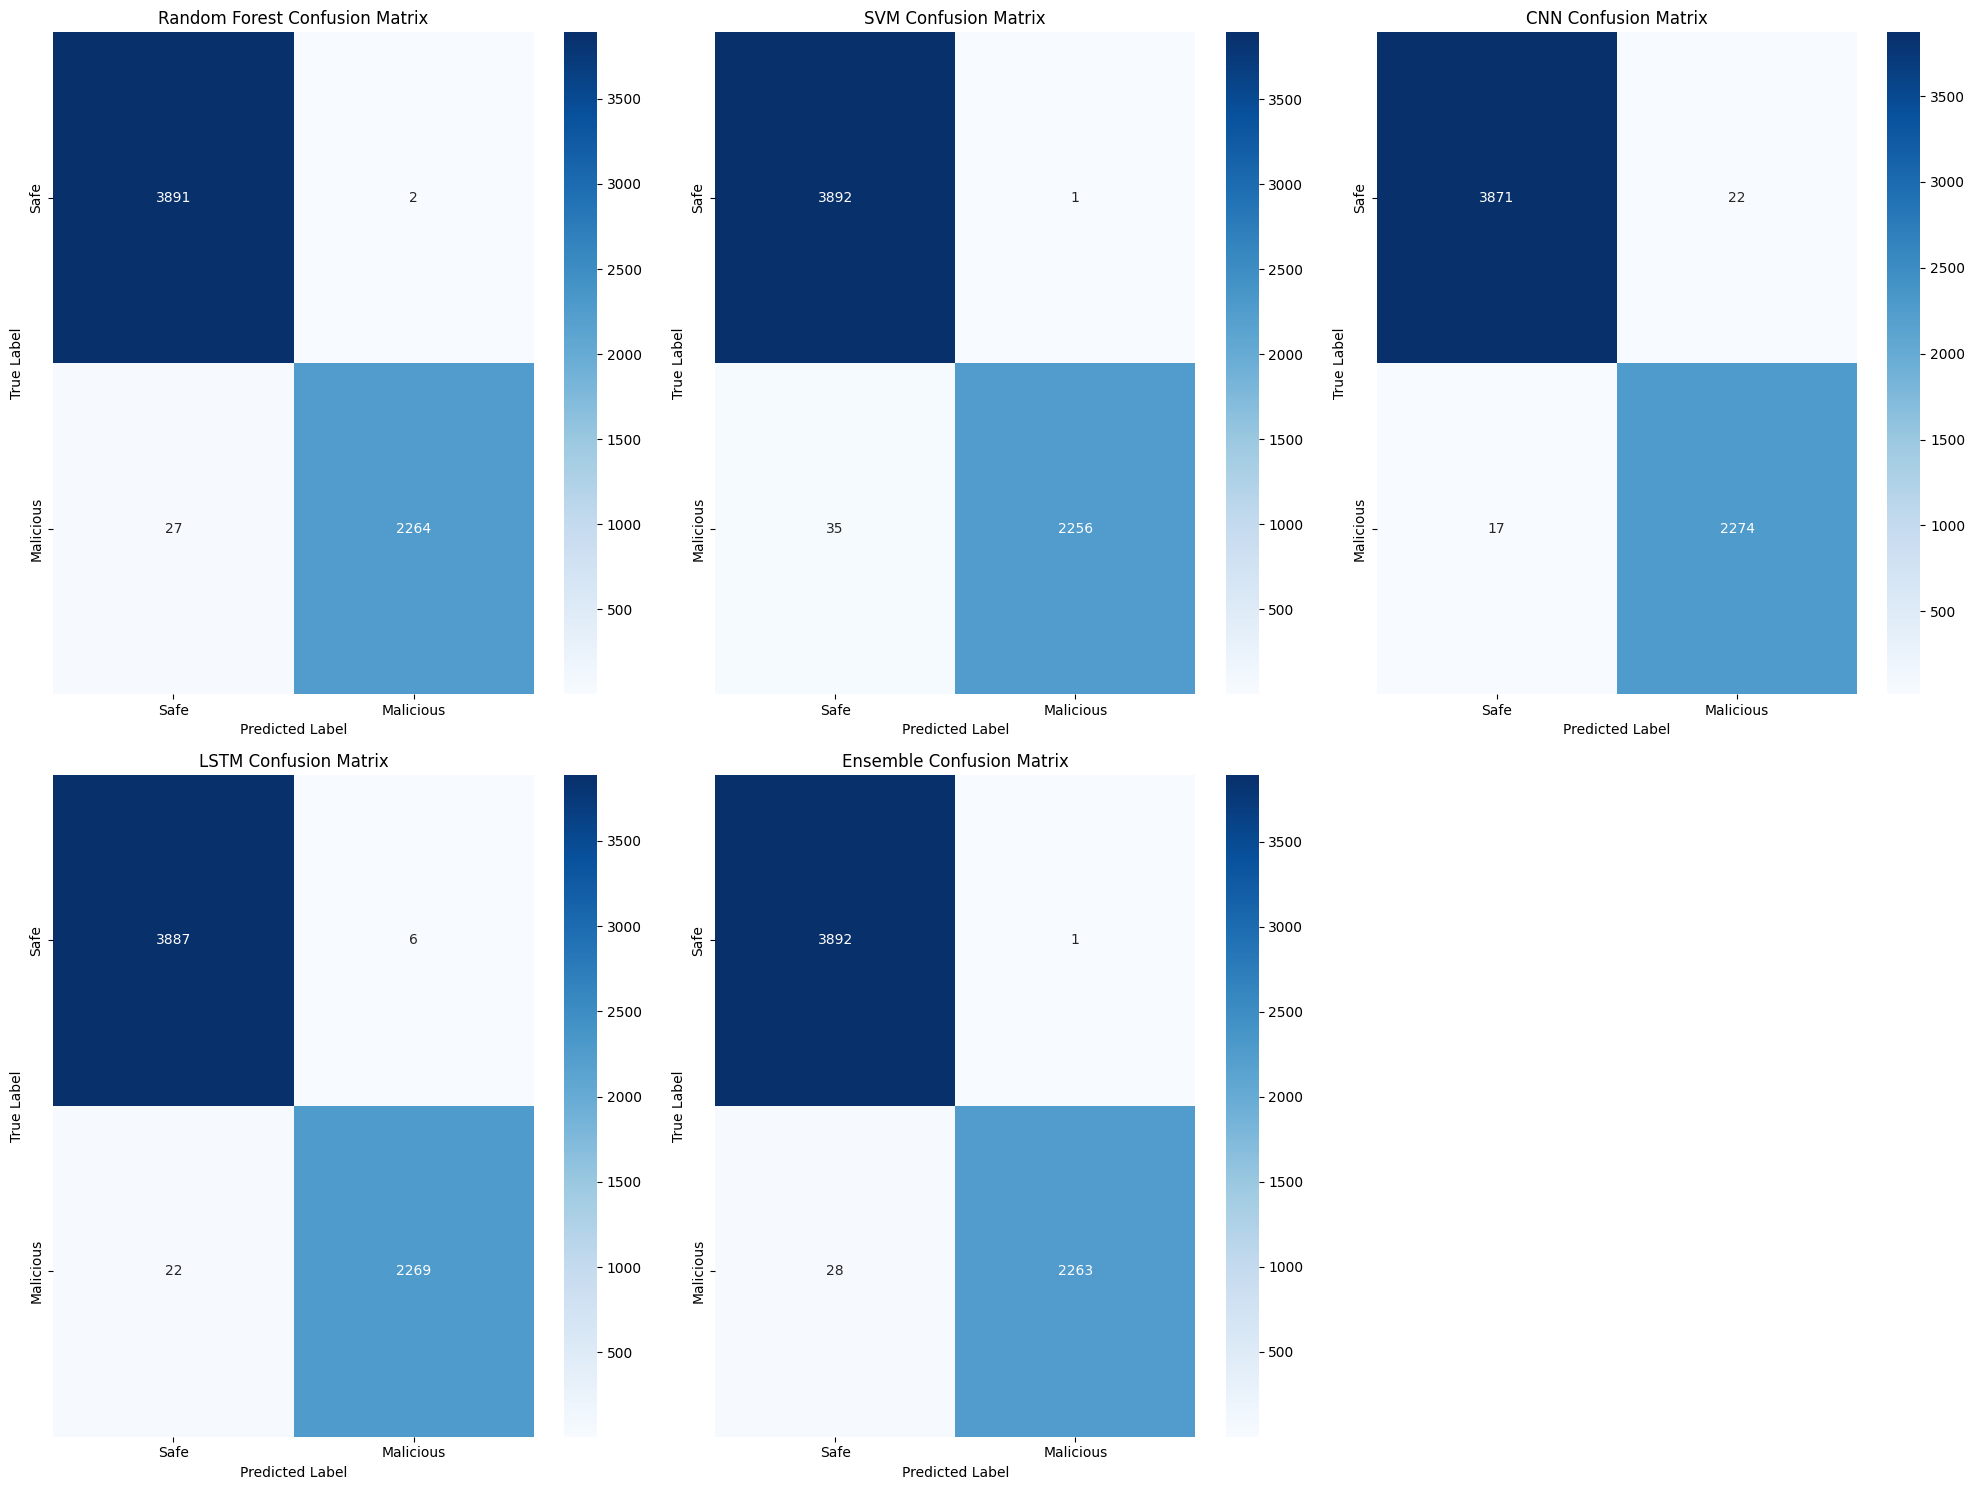

194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step


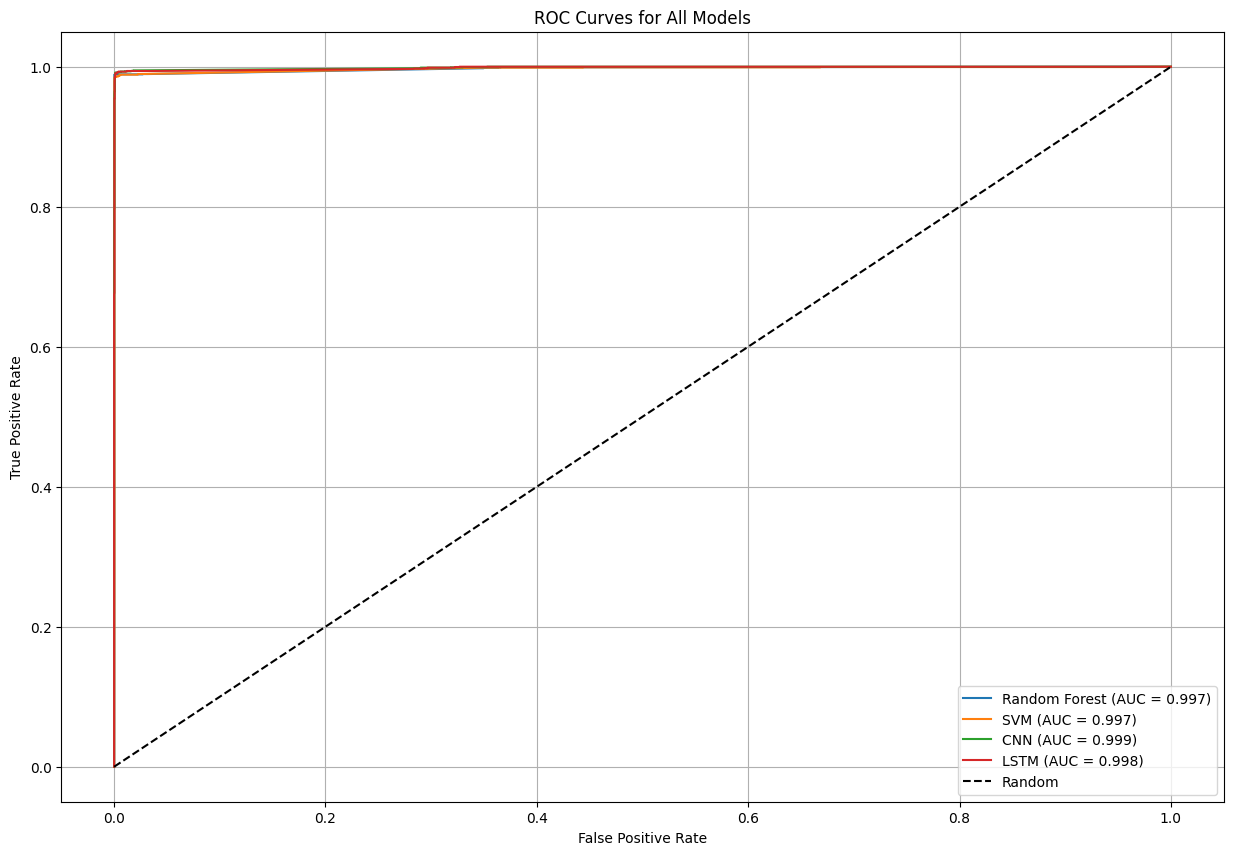

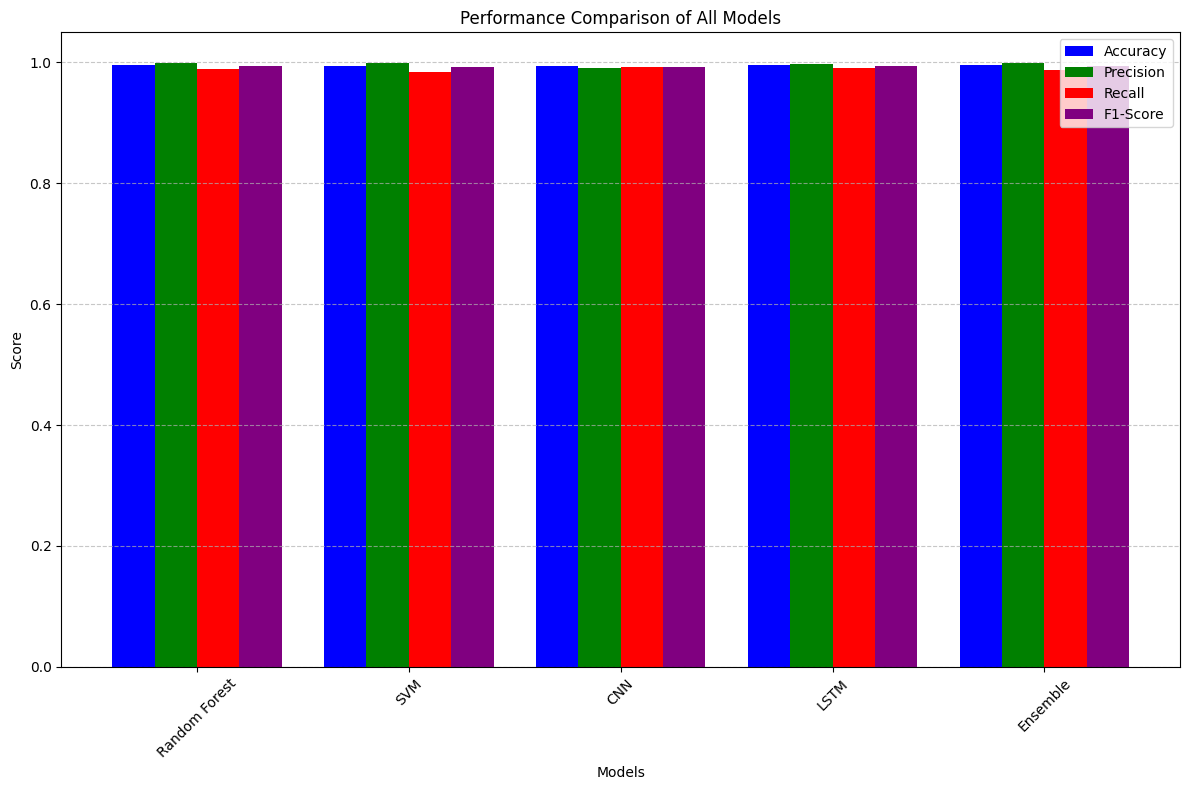

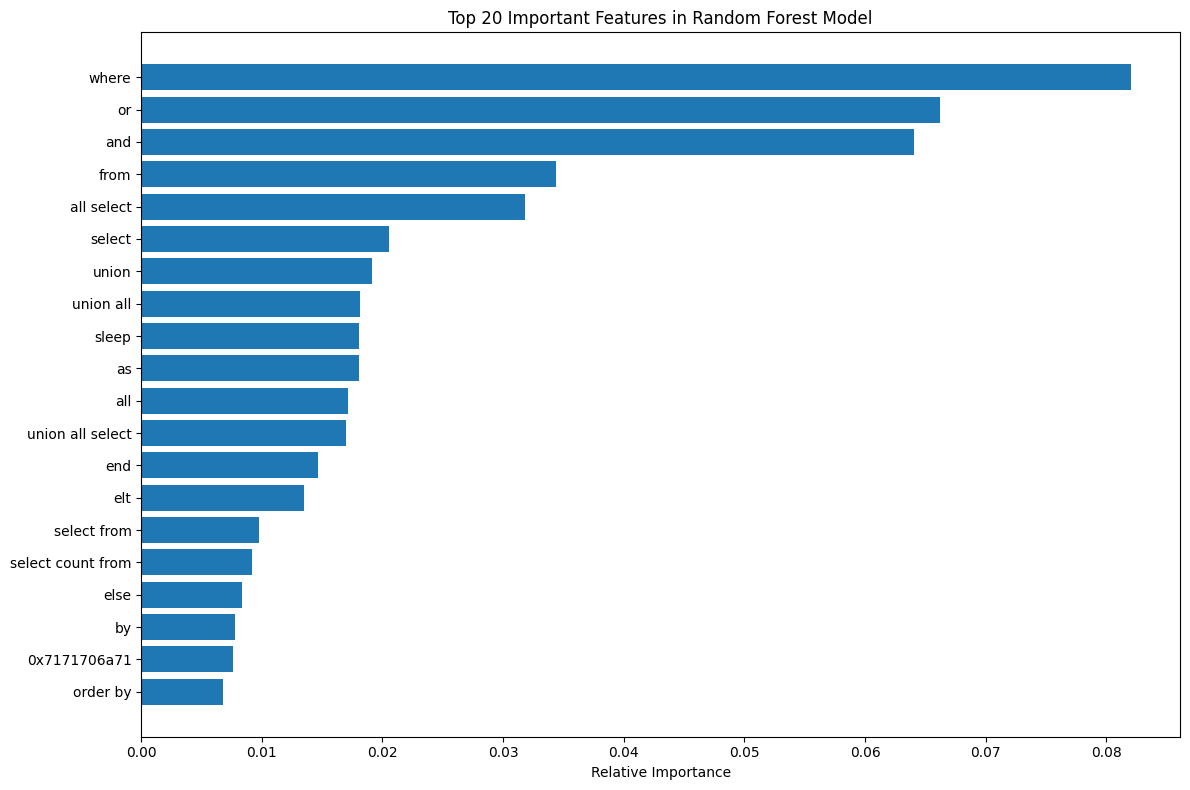

CNN model structure saved as 'cnn_model_structure.png'
LSTM model structure saved as 'lstm_model_structure.png'


<ipython-input-4-314186e5c1e7>:259: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

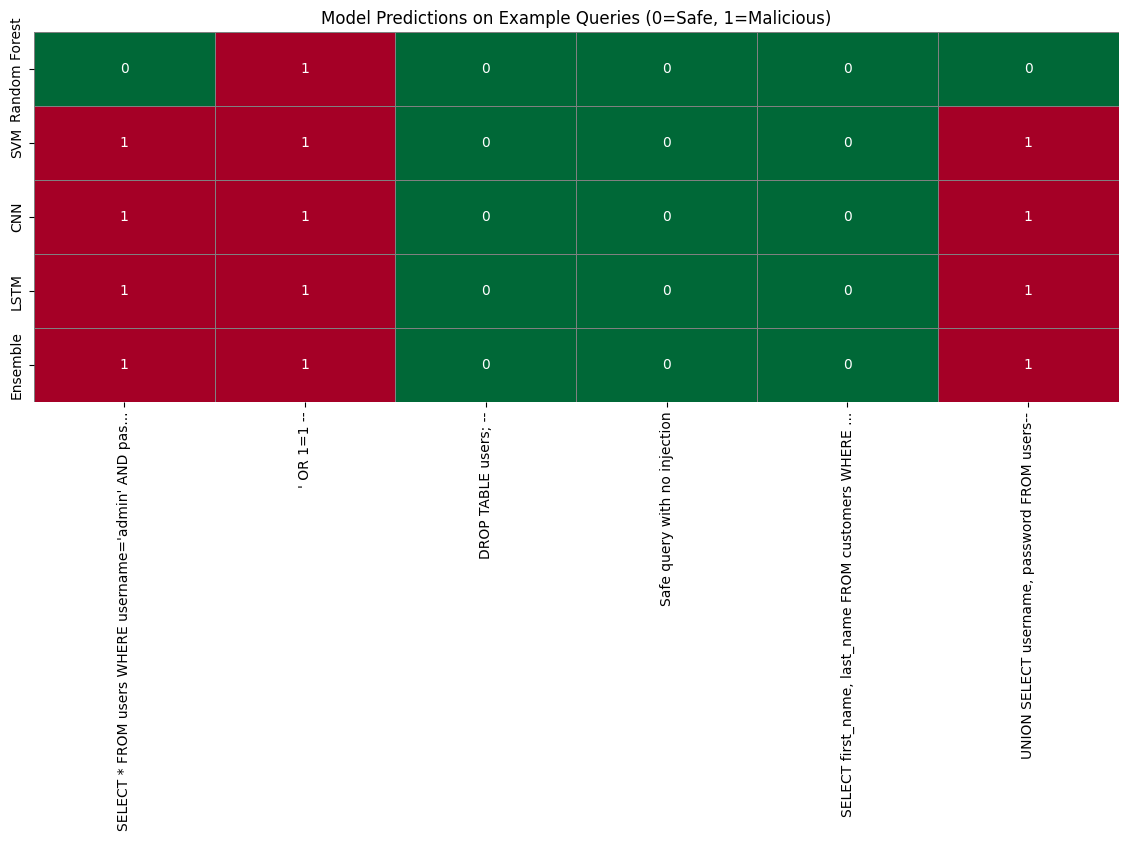


All visualizations completed and saved as PNG files.


In [4]:
# Additional imports for plotting
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

# Assuming the training code has already been executed and we have the models
# and their training histories

# Step 6: Generate performance metrics for all models
print("\n===== MODEL PERFORMANCE METRICS =====")

# Function to calculate and print metrics for any model
def print_metrics(y_true, y_pred, model_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_true, y_pred))
    
    return precision, recall, f1, accuracy

# Calculate metrics for each model
rf_metrics = print_metrics(y_test, rf_pred, "Random Forest")
svm_metrics = print_metrics(y_test, svm_pred, "SVM")
cnn_metrics = print_metrics(y_test, cnn_pred, "CNN")
lstm_metrics = print_metrics(y_test, lstm_pred, "LSTM")
ensemble_metrics = print_metrics(y_test, ensemble_pred, "Ensemble")

# Step 7: Create plots for all models

# 7.1: Confusion matrices for all models
plt.figure(figsize=(20, 15))

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(f'{title} Confusion Matrix')
    ax.set_xticklabels(['Safe', 'Malicious'])
    ax.set_yticklabels(['Safe', 'Malicious'])

# Plot confusion matrices for all models
plt.subplot(2, 3, 1)
plot_confusion_matrix(y_test, rf_pred, plt.gca(), "Random Forest")

plt.subplot(2, 3, 2)
plot_confusion_matrix(y_test, svm_pred, plt.gca(), "SVM")

plt.subplot(2, 3, 3)
plot_confusion_matrix(y_test, cnn_pred, plt.gca(), "CNN")

plt.subplot(2, 3, 4)
plot_confusion_matrix(y_test, lstm_pred, plt.gca(), "LSTM")

plt.subplot(2, 3, 5)
plot_confusion_matrix(y_test, ensemble_pred, plt.gca(), "Ensemble")

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()

# 7.2: ROC curves for all models
plt.figure(figsize=(15, 10))

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, label):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.3f})')

# Calculate and plot ROC curves
# For RF (has predict_proba)
plot_roc_curve(y_test, rf_model.predict_proba(X_test_tfidf)[:, 1], "Random Forest")

# For SVM (has predict_proba since probability=True was set)
plot_roc_curve(y_test, svm_model.predict_proba(X_test_tfidf)[:, 1], "SVM")

# For CNN
plot_roc_curve(y_test, cnn_model.predict(X_test_padded).flatten(), "CNN")

# For LSTM
plot_roc_curve(y_test, lstm_model.predict(X_test_padded).flatten(), "LSTM")

# Add diagonal line representing random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curves.png')
plt.show()

# 7.3: Model comparison bar chart
plt.figure(figsize=(12, 8))

models = ['Random Forest', 'SVM', 'CNN', 'LSTM', 'Ensemble']
accuracies = [rf_metrics[3], svm_metrics[3], cnn_metrics[3], lstm_metrics[3], ensemble_metrics[3]]
precisions = [rf_metrics[0], svm_metrics[0], cnn_metrics[0], lstm_metrics[0], ensemble_metrics[0]]
recalls = [rf_metrics[1], svm_metrics[1], cnn_metrics[1], lstm_metrics[1], ensemble_metrics[1]]
f1_scores = [rf_metrics[2], svm_metrics[2], cnn_metrics[2], lstm_metrics[2], ensemble_metrics[2]]

x = np.arange(len(models))
width = 0.2

plt.bar(x - width*1.5, accuracies, width, label='Accuracy', color='blue')
plt.bar(x - width/2, precisions, width, label='Precision', color='green')
plt.bar(x + width/2, recalls, width, label='Recall', color='red')
plt.bar(x + width*1.5, f1_scores, width, label='F1-Score', color='purple')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Comparison of All Models')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

# 7.4: Feature importance for Random Forest (for interpretability)
if hasattr(rf_model, 'feature_importances_'):
    # Get feature names and their importance scores
    feature_names = tfidf_vectorizer.get_feature_names_out()
    importances = rf_model.feature_importances_
    
    # Sort features by importance
    indices = np.argsort(importances)[-20:]  # Get top 20 features
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.title('Top 20 Important Features in Random Forest Model')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()

# 7.5: Learning curves for deep learning models
# Plot training history for CNN if available
if 'history' in locals() or 'history' in globals():
    # If you've saved CNN training history
    cnn_history = cnn_model.history.history
    
    plt.figure(figsize=(15, 6))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(cnn_history['accuracy'], label='Train Accuracy')
    plt.plot(cnn_history['val_accuracy'], label='Validation Accuracy')
    plt.title('CNN Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(cnn_history['loss'], label='Train Loss')
    plt.plot(cnn_history['val_loss'], label='Validation Loss')
    plt.title('CNN Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('cnn_learning_curves.png')
    plt.show()

    # If you've saved LSTM training history
    lstm_history = lstm_model.history.history
    
    plt.figure(figsize=(15, 6))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(lstm_history['accuracy'], label='Train Accuracy')
    plt.plot(lstm_history['val_accuracy'], label='Validation Accuracy')
    plt.title('LSTM Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(lstm_history['loss'], label='Train Loss')
    plt.plot(lstm_history['val_loss'], label='Validation Loss')
    plt.title('LSTM Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('lstm_learning_curves.png')
    plt.show()

# 7.6: Visualize model structures for neural networks
# Try to plot the model architecture if Graphviz is available
try:
    # CNN model architecture
    plot_model(cnn_model, to_file='cnn_model_structure.png', 
               show_shapes=True, show_layer_names=True, 
               rankdir='TB', expand_nested=True)
    print("CNN model structure saved as 'cnn_model_structure.png'")
    
    # LSTM model architecture
    plot_model(lstm_model, to_file='lstm_model_structure.png', 
               show_shapes=True, show_layer_names=True, 
               rankdir='TB', expand_nested=True)
    print("LSTM model structure saved as 'lstm_model_structure.png'")
except Exception as e:
    print(f"Could not generate model structure diagrams: {e}")
    print("Note: You may need to install Graphviz to visualize model structures.")
    
    # Alternative: Print model summaries
    print("\nCNN Model Summary:")
    cnn_model.summary()
    
    print("\nLSTM Model Summary:")
    lstm_model.summary()

# 7.7: Sample prediction visualization
plt.figure(figsize=(12, 8))
# Create a visualization of predictions on the example queries
example_results = []
for i, query in enumerate(new_queries):
    example_results.append({
        'query_id': i+1,
        'query_short': query[:50] + ('...' if len(query) > 50 else ''),
        'rf': rf_new_pred[i],
        'svm': svm_new_pred[i],
        'cnn': cnn_new_pred[i],
        'lstm': lstm_new_pred[i],
        'ensemble': ensemble_new_pred[i]
    })

# Convert to DataFrame for easier visualization
import pandas as pd
example_df = pd.DataFrame(example_results)

# Plot as a heatmap
plt.figure(figsize=(14, len(new_queries)*0.8))
sns.heatmap(example_df[['rf', 'svm', 'cnn', 'lstm', 'ensemble']].T, 
            annot=True, cmap='RdYlGn_r', cbar=False,
            linewidths=0.5, linecolor='gray',
            xticklabels=[row['query_short'] for _, row in example_df.iterrows()],
            yticklabels=['Random Forest', 'SVM', 'CNN', 'LSTM', 'Ensemble'])
plt.title('Model Predictions on Example Queries (0=Safe, 1=Malicious)')
plt.tight_layout()
plt.savefig('example_predictions.png')
plt.show()

print("\nAll visualizations completed and saved as PNG files.")